## Identifying Bobcats, Coyotes, and Foxes Using Scat Data

Gavin Woodgate

Milwaukee School of Engineering

Updated 07/04/2024

## Part I: Introduction and Background

This experiment references a paper published by Rachel E. Reid, "A Morphometric Modeling Approach to Distinguishing Among Bobcat, Coyote, and Gray Fox Scats" in the Journal Wildlife Biology. Read the original paper [here](https://nsojournals.onlinelibrary.wiley.com/doi/10.2981/wlb.00105).

This section provides a very brief introduction to the animals that are included in the species data. The information provided in this section is not comprehensive, but it includes some basic information about the diet, habitat, and the general size of these common animals.

### Coyotes
#### Diet
According to the National Park Service, coyotes will eat anything when the opportunity presents itself. They will eat rabbits, rodents, fish, insects, snakes, carrion, and even larger animals like deer. They will also eat fruit, seeds, and grass.

#### Habitat
Coyotes can be found across North America and in some parts of Central America. They are found in nearly every habitat including deserts, swamps, tundra, grasslands, brush, forests, and have even adapted to living in urban areas.

#### Size
Coyotes range from 2-3 feet tall with the average weight being 25-35 pounds. 

### Bobcats
#### Diet
According to nature.org, bobcats are carnivores and will eat rabbits, rodents, birds, and even deer. They will also eat insects and reptiles.

#### Habitat
Bobcats are found throughout North America and reside in forests, mountains and brushlands. They prefer heavily wooded areas and "rocky outcrops".

#### Size
Bobcats are 24-48 inches tall and 24-48 pounds. They weigh 15-30 pounds on average.

### Foxes
#### Diet
Red foxes' diets mainly consist of smaller animals like rodents and rabbits. They are also known to eat birds, fish, fruits, berries, nuts, carrion, and garbage.

#### Habitat
Red foxes are found throughout North America and prefer open areas, wetlands, and fields. They also are known to live in rural and suburban areas. 

#### Size
Adult red foxes weigh between 8 to 15 pounds and are 3-4 feet long from nose to tail. 

#### Population Estimation Methods

There are several methods for estimating populations of terrestrial animals. The three main categories for population estimation techniques are observational, capture, and marking. Observation methods often involve direct observational methods including line transect sampling, distance sampling, and camera traps. These are population density techniques where the population is estimated by counting the number of animals in a given area. Observational methods can also be indirect including animal signs as well as pellet & scat counts. Capture methods include capture-recapture, mark-resight, and mark-recapture. These methods involve capturing animals, marking them, and then releasing them back into the wild. The population is estimated by the number of marked animals recaptured. Marking methods include mark-resight, mark-recapture, and DNA sampling. These methods involve marking animals in some way and then estimating the population by the number of marked animals recaptured.

### Part II: Analysis

Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy import stats
import os
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('ggplot')

Loading and Cleaning Data

In [2]:
df = pd.read_csv("data" + os.sep + "Dataset_BobcatsCoyotesFoxes-1.csv")
df.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    110 non-null    object 
 1   Month      110 non-null    object 
 2   Year       110 non-null    int64  
 3   Site       110 non-null    object 
 4   Location   110 non-null    object 
 5   Age        110 non-null    int64  
 6   Number     110 non-null    int64  
 7   Length     110 non-null    float64
 8   Diameter   104 non-null    float64
 9   Taper      93 non-null     float64
 10  TI         93 non-null     float64
 11  Mass       109 non-null    float64
 12  d13C       108 non-null    float64
 13  d15N       108 non-null    float64
 14  CN         108 non-null    float64
 15  Ropey      110 non-null    int64  
 16  Segmented  110 non-null    int64  
 17  Flat       110 non-null    int64  
 18  Scrape     110 non-null    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 1

The following categories were converted to categorical types. Age and Number were determined to be categorical due to the low unique values in the categories while the other categories were determined to be categorical due to the nature of the data.

In [4]:
df[['Species', 'Month', 'Year', 'Site', 'Location', 'Age', 'Number', 'Ropey', 'Segmented', 'Flat', 'Scrape']] = df[['Species', 'Month', 'Year', 'Site', 'Location', 'Age', 'Number', 'Ropey', 'Segmented', 'Flat', 'Scrape']].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    110 non-null    category
 1   Month      110 non-null    category
 2   Year       110 non-null    category
 3   Site       110 non-null    category
 4   Location   110 non-null    category
 5   Age        110 non-null    category
 6   Number     110 non-null    category
 7   Length     110 non-null    float64 
 8   Diameter   104 non-null    float64 
 9   Taper      93 non-null     float64 
 10  TI         93 non-null     float64 
 11  Mass       109 non-null    float64 
 12  d13C       108 non-null    float64 
 13  d15N       108 non-null    float64 
 14  CN         108 non-null    float64 
 15  Ropey      110 non-null    category
 16  Segmented  110 non-null    category
 17  Flat       110 non-null    category
 18  Scrape     110 non-null    category
dtypes: category(11), float64(8)
m

In [6]:
df.isna().sum()

Species       0
Month         0
Year          0
Site          0
Location      0
Age           0
Number        0
Length        0
Diameter      6
Taper        17
TI           17
Mass          1
d13C          2
d15N          2
CN            2
Ropey         0
Segmented     0
Flat          0
Scrape        0
dtype: int64

In [7]:
df = df.dropna()

Anomolies were determined to be values that were NaN or null. In this dataset, Diameter had 6, Taper had 17, TI had 17, Mass had 1, d13C had 2, d15N had 2, and CN had 2 anomolies where the value was NaN. These anomolies could have propogated in various ways including measurment error. Outliers were determined to be values that were above 1.5 times the IQR above the third quartile or below 1.5 times the IQR below the first quartile. This method was used because is resistant to the outliers themselves because median is used as the metric for the IQR. The following box plots show the outliers for each category. One assumption that this methodology makes is that the data is close to normally distributed. Based on the box plots of the uncleaned data, this assumption holds true for this particular dataset, although it may not hold true for other datasets and/or categories.

In order to clean the data, a method called filter_group was created. This method identifies and removes outliers in each numerical category for each group.

In [8]:
def filter_group(group):
    """Filters out outliers for a group of values based on the IQR"""
    # Only run on numerical columns
    numerical_cols = group.select_dtypes(include=['number']).columns
    Q1 = group[numerical_cols].quantile(0.25)
    Q3 = group[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[~((group[numerical_cols] < lower) | (group[numerical_cols] > upper)).any(axis=1)]


In [9]:
# Apply the filter_group function to each group of the dataframe
cleaned_df = df.groupby('Species', observed=False).apply(filter_group).reset_index(drop=True)

In [10]:
def plot_boxplots(df1, df2, column_name):
    """Creates two boxplots side by side for a column in the two dataframes"""
    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

    sns.boxplot(data=df1, x='Species', y=column_name, ax=axs[0])
    axs[0].set_title(f"{column_name} Boxplot")

    sns.boxplot(data=df2, x='Species', y=column_name, ax=axs[1])
    axs[1].set_title(f"Cleaned {column_name} Boxplot")

    plt.show()

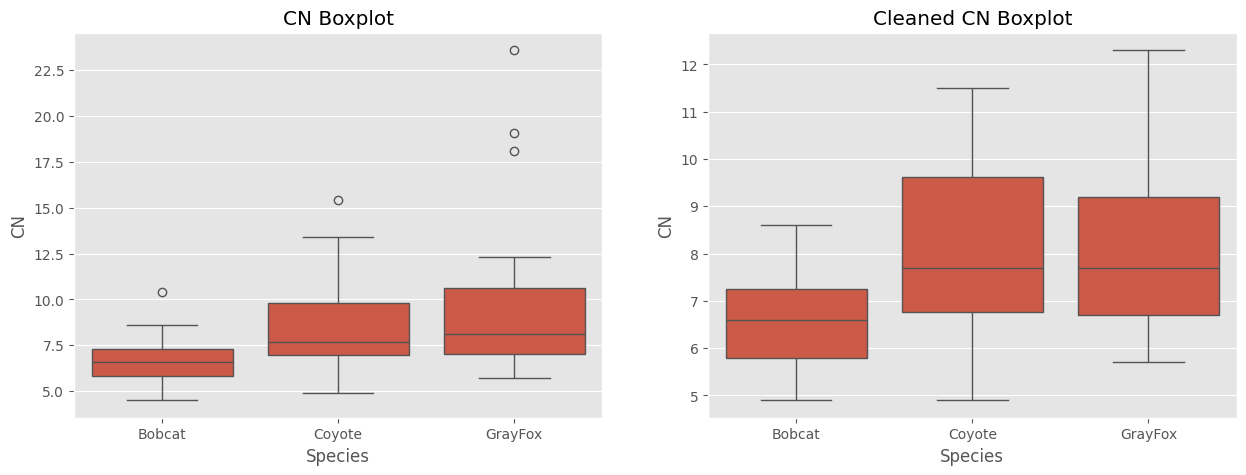

In [11]:
plot_boxplots(df, cleaned_df, 'CN')

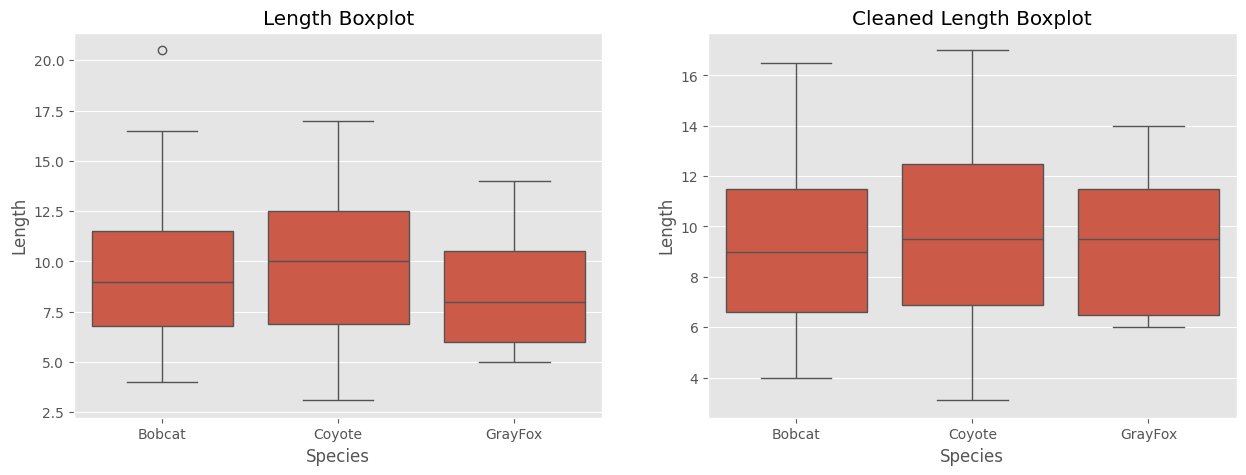

In [12]:
plot_boxplots(df, cleaned_df, 'Length')

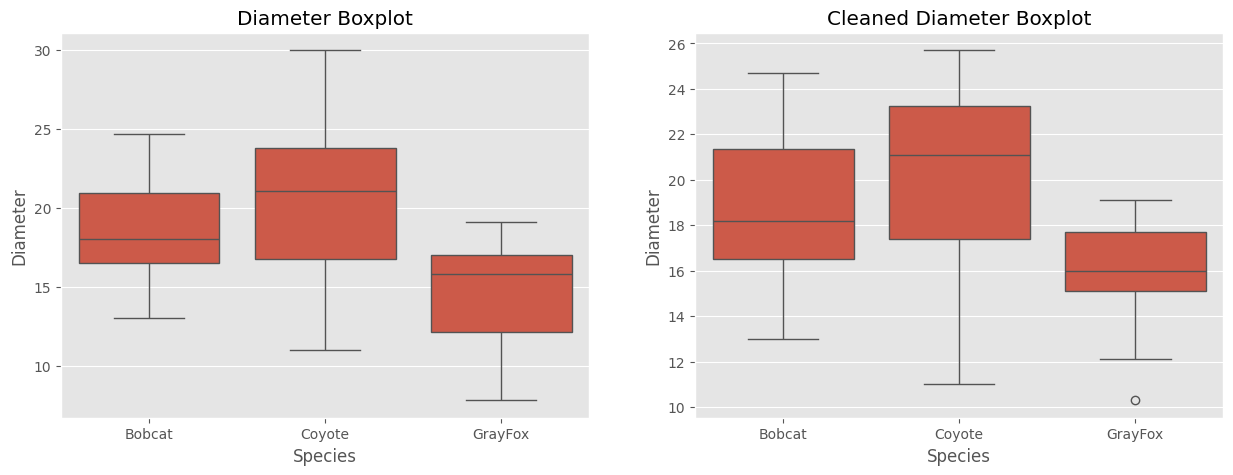

In [13]:
plot_boxplots(df, cleaned_df, 'Diameter')

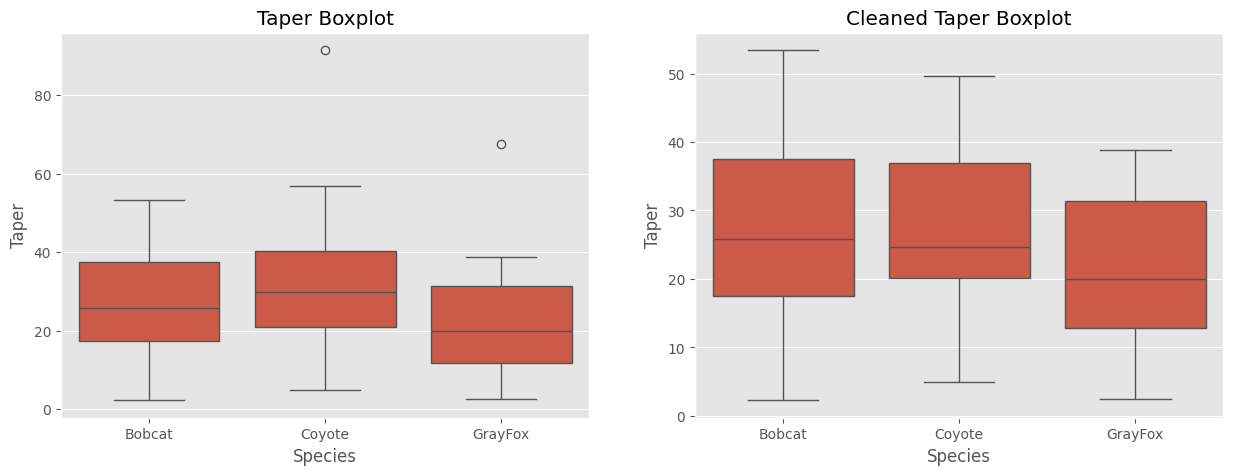

In [14]:
plot_boxplots(df, cleaned_df, 'Taper')

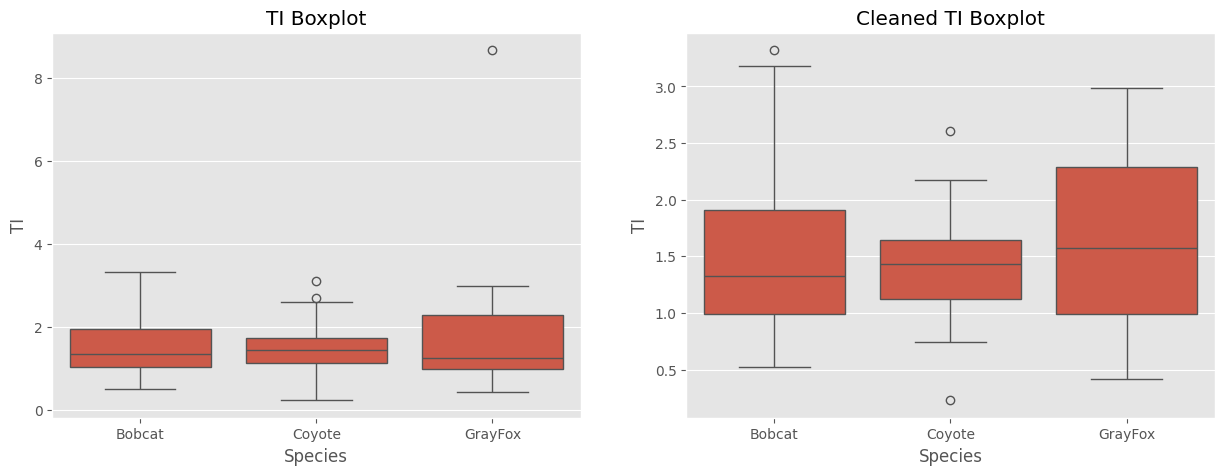

In [15]:
plot_boxplots(df, cleaned_df, 'TI')

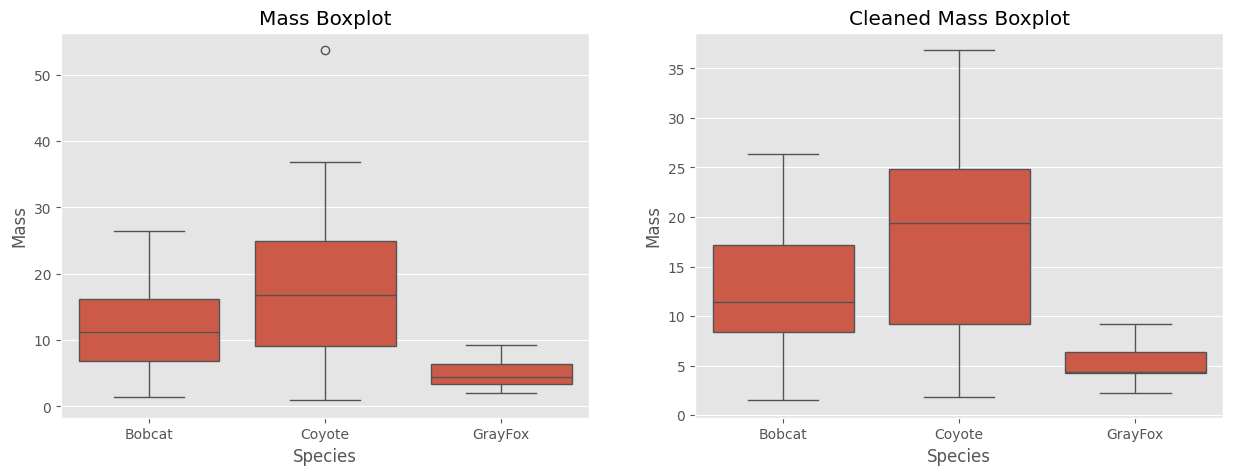

In [16]:
plot_boxplots(df, cleaned_df, 'Mass')

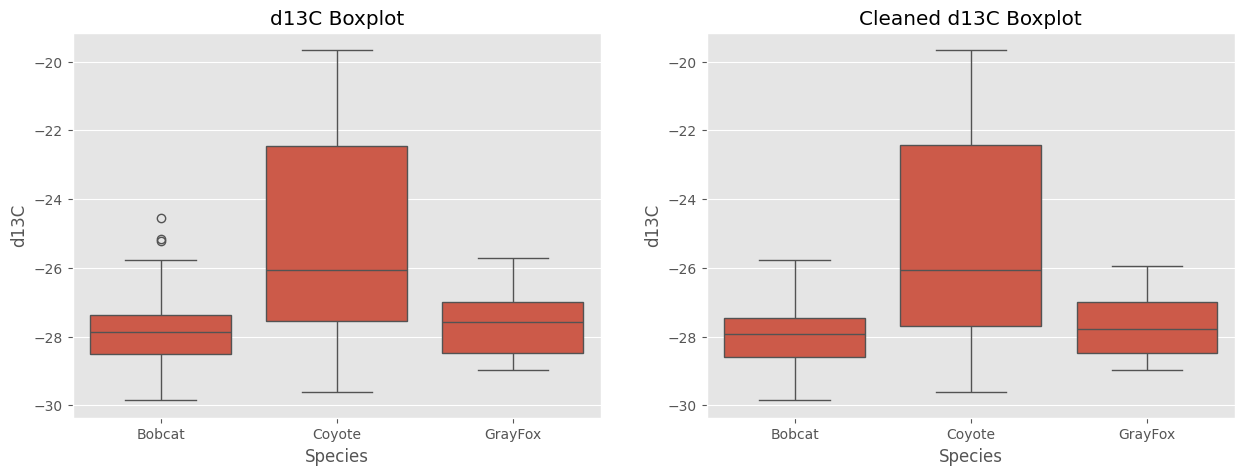

In [17]:
plot_boxplots(df, cleaned_df, 'd13C')

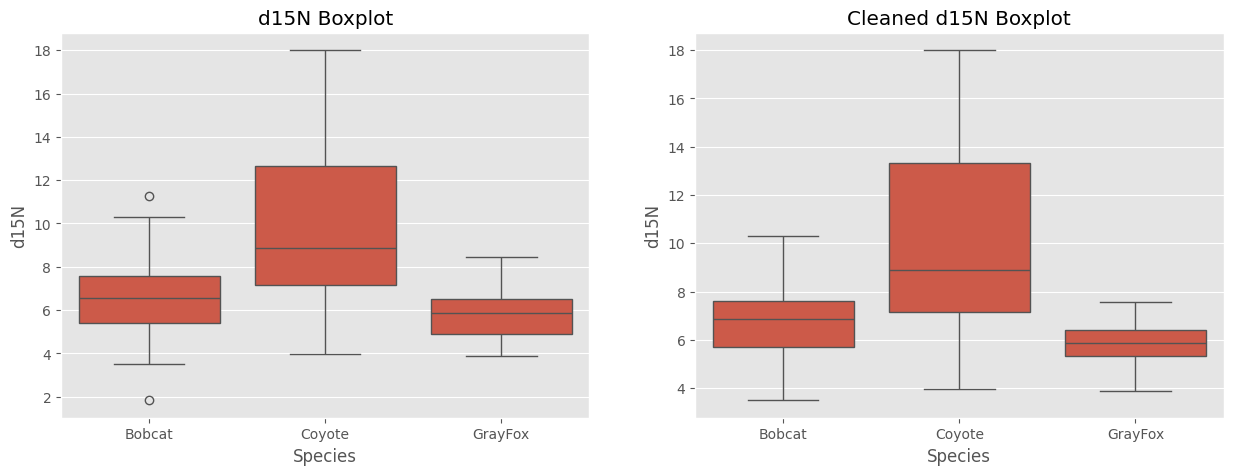

In [18]:
plot_boxplots(df, cleaned_df, 'd15N')

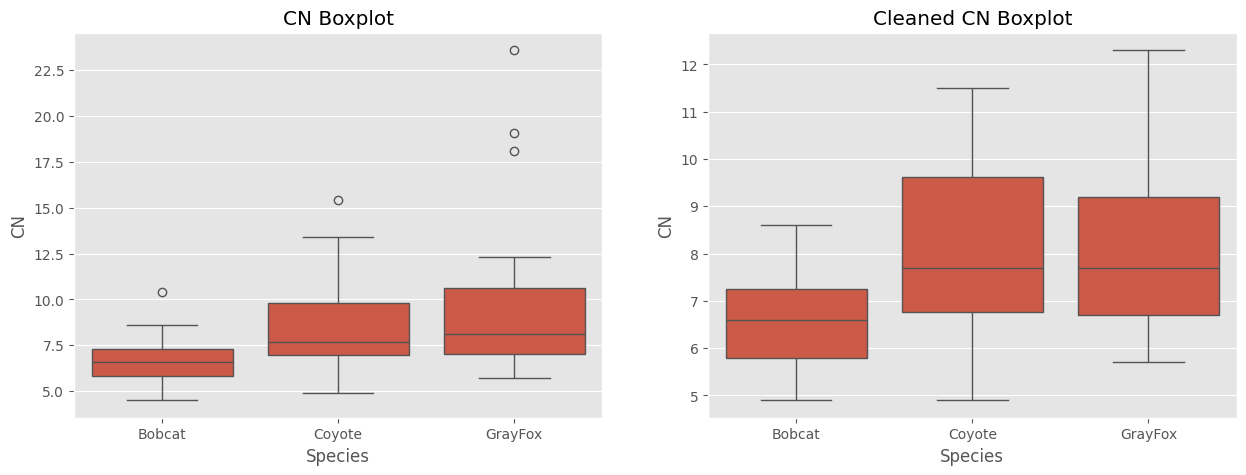

In [19]:
plot_boxplots(df, cleaned_df, 'CN')

In subsequent parts of this report, the cleaned data will be used for analysis. The original dataframe named 'df' will be replaced with the cleaned dataframe named 'cleaned_df' for brevity.

In [20]:
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    76 non-null     category
 1   Month      76 non-null     category
 2   Year       76 non-null     category
 3   Site       76 non-null     category
 4   Location   76 non-null     category
 5   Age        76 non-null     category
 6   Number     76 non-null     category
 7   Length     76 non-null     float64 
 8   Diameter   76 non-null     float64 
 9   Taper      76 non-null     float64 
 10  TI         76 non-null     float64 
 11  Mass       76 non-null     float64 
 12  d13C       76 non-null     float64 
 13  d15N       76 non-null     float64 
 14  CN         76 non-null     float64 
 15  Ropey      76 non-null     category
 16  Segmented  76 non-null     category
 17  Flat       76 non-null     category
 18  Scrape     76 non-null     category
dtypes: category(11), float64(8)
mem

Below are the categorizations of each of the variables in the dataset.

| Variable  | Category       |
|-----------|----------------|
| Species   | Not a Trait    |
| Month     | Contextual     |
| Year      | Contextual     |
| Site      | Contextual     |
| Location  | Contextual     |
| Age       | Contextual     |
| Number    | Morphological  |
| Length    | Morphological  |
| Diameter  | Morphological  |
| Taper     | Morphological  |
| TI        | Morphological  |
| Mass      | Morphological  |
| d13C      | Biogeochemical |
| d15N      | Biogeochemical |
| CN        | Biogeochemical |
| Ropey     | Morphological  |
| Segmented | Morphological  |
| Flat      | Morphological  |
| Scrape    | Morphological  |

An initial $\alpha$ value of 0.05 was chosen as the threshold for statistical significance. To correct for family-wise error, the Bonferroni correction was used. This correction divides each alpha value by the number of tests that were performed. Since there are 13 categories, the alpha value for each test will be adjusted to be $\alpha$ = (0.05/13) = 0.003846.

In [21]:
def kruskal_wallis_test(df, column_name):
    samples_by_group = []
    for value in set(df['Species']):
        mask = df['Species'] == value
        samples_by_group.append(df[column_name][mask])
    return stats.kruskal(*samples_by_group)

In [22]:
kruskal_wallis_test(df, 'Length')

KruskalResult(statistic=0.6573295821356413, pvalue=0.7198842879501415)

In [23]:
kruskal_wallis_test(df, 'Diameter')

KruskalResult(statistic=11.444938594277424, pvalue=0.0032716223122727373)

In [24]:
kruskal_wallis_test(df, 'Taper')

KruskalResult(statistic=1.481035627562809, pvalue=0.476866923313781)

In [25]:
kruskal_wallis_test(df, 'TI')

KruskalResult(statistic=0.34680107721968856, pvalue=0.8408007742170273)

In [26]:
kruskal_wallis_test(df, 'Mass')

KruskalResult(statistic=21.506604289223645, pvalue=2.1374709270547987e-05)

In [27]:
kruskal_wallis_test(df, 'd13C')

KruskalResult(statistic=12.472996686336352, pvalue=0.001956695215897917)

In [28]:
kruskal_wallis_test(df, 'd15N')

KruskalResult(statistic=20.57499772176625, pvalue=3.405618623762849e-05)

In [29]:
kruskal_wallis_test(df, 'CN')

KruskalResult(statistic=15.17585475596587, pvalue=0.0005065298115894933)

In [30]:
combination_counts = pd.crosstab(df['Species'], df['Number'])
stats.chi2_contingency(combination_counts)

Chi2ContingencyResult(statistic=11.300468388300231, pvalue=0.5033591152773482, dof=12, expected_freq=array([[ 7.35526316, 14.14473684, 10.18421053,  6.78947368,  1.69736842,
         1.69736842,  1.13157895],
       [ 3.42105263,  6.57894737,  4.73684211,  3.15789474,  0.78947368,
         0.78947368,  0.52631579],
       [ 2.22368421,  4.27631579,  3.07894737,  2.05263158,  0.51315789,
         0.51315789,  0.34210526]]))

In [31]:
combination_counts = pd.crosstab(df['Species'], df['Ropey'])
stats.chi2_contingency(combination_counts)

Chi2ContingencyResult(statistic=3.278365917028707, pvalue=0.19413859679681522, dof=2, expected_freq=array([[15.84210526, 27.15789474],
       [ 7.36842105, 12.63157895],
       [ 4.78947368,  8.21052632]]))

In [32]:
combination_counts = pd.crosstab(df['Species'], df['Segmented'])
stats.chi2_contingency(combination_counts)

Chi2ContingencyResult(statistic=5.549826553628373, pvalue=0.062354884069394975, dof=2, expected_freq=array([[16.97368421, 26.02631579],
       [ 7.89473684, 12.10526316],
       [ 5.13157895,  7.86842105]]))

In [33]:
combination_counts = pd.crosstab(df['Species'], df['Flat'])
stats.chi2_contingency(combination_counts)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[43.],
       [20.],
       [13.]]))

For the geochemical and morphological traits that were tested (d13C, d15N, CN, Number, Length, Diameter, Taper, TI, Mass), the traits that were determined to be the most useful to distinguish between species were diameter, mass, d13C, d15N, and CN because the p-values for these traits were less than the adjusted alpha value of 0.003846. The traits that were determined to be the least useful to distinguish between species were number, length, taper, and TI because the p-values for these traits were greater than the adjusted alpha value of 0.003846.

#### Part III: Discussison and Interpretation

The describe_species function below takes in a species name and returns a dataframe with the descriptive statistics for each trait for that species. 

In [34]:
# This is a list of all the statistically significant traits
traits = ['Diameter', 'Mass', 'd13C', 'd15N', 'CN']
def describe_species(species, traits):
    """Creates a table of descriptive statistics for a species"""
    species_df = df[df['Species'] == species]
    return species_df[traits].describe().transpose()

Below are the tables of the summary statistics for each species. Using the statistically significant traits for each species, the average diameter of Bobcat scat was 18.89 compared to 20.21 for Coyote and 15.94 for Gray Fox. The mass for Bobcat scat was 12.65 compared to 18.49 for Coyote and 5.27 for Gray Fox. The d13C for Bobcat was -27.93 compared to -24.99 for Coyote and -27.7 for Gray Fox. The d15N for Bobcat scat was 6.65 compared to 10.03 for Coyote and 5.73 for Gray Fox. Lastly, CN for Bobcat was 6.58 compared 8.14 for Coyote and 8.09 for Gray Fox. The traits with difference relate to the biology of the three species because they are all related to the diet of the species. For example, the size and mass of the scat is related to the size of the animal. This explains the difference between Gray Fox scat mass and diameter being smaller than the Coyote and Bobcat scat. The d13C and d15N are related to the diet of the animal. Bobcats are carnivores compared to the Coyote and Gray Fox being omnivores. The diets of the animals contribute to the differences in the d13C, d15N, and CN measurements. Specifically for the Coyotes, the standard deviation of the measurements was significantly higher compared to the Gray Fox and Bobcat likely due to the extremely varied diet of the Coyote. The predictive morphological and biogeochemical traits might be more useful than contextual traits to ecologists because they are more objective and can be measured more easily. Contextual traits are more subjective and can be more difficult to measure.

In [35]:
describe_species('Bobcat', traits)

,count,mean,std,min,25%,50%,75%,max
Diameter,43.0,18.893023,2.747674,13.00,16.50,18.20,21.350,24.70
Mass,43.0,12.645116,6.374197,1.50,8.38,11.39,17.165,26.41
d13C,43.0,-27.936977,0.884554,-29.85,-28.60,-27.92,-27.445,-25.76
d15N,43.0,6.650000,1.562577,3.50,5.69,6.85,7.600,10.32
CN,43.0,6.578372,0.960709,4.90,5.80,6.60,7.250,8.60


In [36]:
describe_species('Coyote', traits)

,count,mean,std,min,25%,50%,75%,max
Diameter,20.0,20.2100,4.433948,11.00,17.3750,21.100,23.2500,25.70
Mass,20.0,18.4955,10.275015,1.81,9.1875,19.430,24.8800,36.84
d13C,20.0,-24.9920,3.270219,-29.62,-27.7000,-26.065,-22.4125,-19.67
d15N,20.0,10.0295,3.890413,3.97,7.1750,8.875,13.3075,18.00
CN,20.0,8.1400,1.829121,4.90,6.7750,7.700,9.6250,11.50


In [37]:
describe_species('GrayFox', traits)

,count,mean,std,min,25%,50%,75%,max
Diameter,13.0,15.946154,2.523098,10.30,15.10,16.00,17.70,19.10
Mass,13.0,5.273846,1.993278,2.23,4.24,4.40,6.40,9.23
d13C,13.0,-27.704615,0.892194,-28.97,-28.47,-27.79,-26.99,-25.94
d15N,13.0,5.738462,0.962971,3.90,5.32,5.87,6.39,7.56
CN,13.0,8.092308,1.928930,5.70,6.70,7.70,9.20,12.30


#### Part IV: Conclusion

The results of this analysis show that the morphological and biogeochemical traits that are most useful for distinguishing between species are diameter, mass, d13C, d15N, and CN. The traits that are least useful for distinguishing between species are number, length, taper, and TI. Subjective categories of morphological traits such as "ropey", "segmented", and "flat" failed to show statistical significance. The traits that were considered to be statistically significant were measurable and objective. Contextual traits may prove to be helpful in identifying the species, however these traits were not tested in this analysis. More research is needed to determine the usefulness of contextual traits in identifying species. The predictive morphological and biogeochemical traits might be more useful than contextual traits to ecologists because they are more objective and can be measured more easily. Contextual traits are more subjective and can be more difficult to measure.

To improve this research in the future, more samples should be collected for each species. This would allow for more accurate statistical analysis. One thing to note is that there were only 76 total entries in the set of data, and there was bias in terms of the balance of each species of animal (57% of the data consisted of Bobcat scat compared to 26% consisting of Coyote and only 17% consisting of Gray Fox scat). This small sample of data mixed with the skew for specific species may have affected the results. In addition to collecting more samples, additional species should be tested to determine if the results of this analysis hold true for differentiating other species.

#### References

Brenda McComb, B. Z. (2018, August 1). Field techniques for population sampling and estimation. Monitoring Animal Populations and their Habitats A Practitioners Guide. https://open.oregonstate.education/monitoring/chapter/field-techniques-for-population-sampling-and-estimation/ 

Colorado Parks &amp; Wildlife. Colorado Parks and Wildlife. (n.d.). https://cpw.state.co.us/learn/Pages/LivingwithWildlifeRedFox.aspx 

Journey with nature: Bobcats. The Nature Conservancy. (n.d.). https://www.nature.org/en-us/about-us/where-we-work/united-states/indiana/stories-in-indiana/indiana-bobcats/#:~:text=Bobcats%20are%20entirely%20carnivorous%20and,when%20small%20rodents%20are%20scarce. 

Red Fox. National Wildlife Federation. (n.d.). https://www.nwf.org/educational-resources/wildlife-guide/mammals/red-fox 

Reid, R. E. B. (2015, December 1). A morphometric modeling approach to ... - Wiley Online Library. https://onlinelibrary.wiley.com/doi/10.2981/wlb.00105 
